In [13]:
import meep as mp
import matplotlib.pyplot as plt

In [14]:
SiO2 = mp.Medium(index=1.45)

In [15]:
cell_size = (0.3,0,0.3)

boundary_layer = [
    mp.PML(0.05, mp.X),
    mp.PML(0.05, mp.Z)
                  ]

In [16]:
lambda_min = 0.4
lambda_max = 0.7
fmin = 1 / lambda_min
fmax = 1 / lambda_max
fcen = 0.5 * (fmin+fmax)
df = fmax - fmin
resolution = 100
nfreq = 25

In [17]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=fcen, fwidth=df),
    component=mp.Ez,
    center=source_center
)]

In [18]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [19]:
# --- Flux 모니터 4면 등록 (tight box 기준) ---
offset = 0.05
flux_size_x = 0.1
flux_size_y = 0.1

# Dipole 위치
source_center = mp.Vector3(0, 0, 0)

# 박스 4면
flux_x1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center - mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, 0, flux_size_y),
    direction=mp.Z,
    weight=-1
))
flux_x1_get = sim.get_flux_data(flux_x1)

flux_x2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center + mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, 0, flux_size_x),
    direction=mp.Z
))
flux_x2_get = sim.get_flux_data(flux_x2)

flux_y1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center - mp.Vector3(0, 0, offset),
    size=mp.Vector3(flux_size_y, 0),
    direction=mp.Z,
    weight=-1
))
flux_y1_get = sim.get_flux_data(flux_y1)

flux_y2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center + mp.Vector3(0, 0, offset),
    size=mp.Vector3(flux_size_y, 0),
    direction=mp.Z
))
flux_y2_get = sim.get_flux_data(flux_y2)


-----------
Initializing structure...
time for choose_chunkdivision = 4.79221e-05 s
Working in 3D dimensions.
Computational cell is 0.3 x 0.01 x 0.3 with resolution 100
time for set_epsilon = 0.00166297 s
-----------


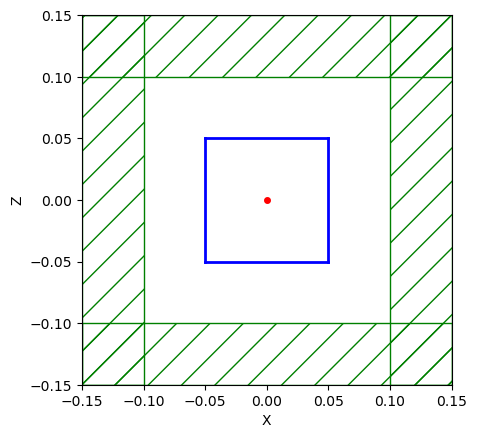

In [20]:
sim.plot2D()
plt.show()

In [21]:
sim.run(until=50)

run 0 finished at t = 50.0 (10000 timesteps)


In [22]:
# sim.run(until_after_sources = mp.stop_when_fields_decayed(50, mp.Ey, source_center, 1e-6))

In [23]:
import numpy as np
net_power = np.array(flux_x2_get+flux_x1_get+flux_y2_get+flux_y1_get)
print(net_power)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
